In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/b2/38/7533745b517c34b7b749a7a21f631711354a3d4d39a840d75d20c94d71a0/yfinance-0.2.51-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     -- ------------------------------------ 71.7/948.2 kB 2.0 MB/s eta 0:00:01
     ----------------- -------------------- 440.3/948.2 kB 5.5 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Install

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [6]:
#QUESTION 1
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical stock data for Tesla
tesla_data = tesla.history(period="1y")  # You can adjust the period as needed, e.g., '1d', '5d', '1mo', '1y'
print(tesla_data)


                                 Open        High         Low       Close  \
Date                                                                        
2024-01-08 00:00:00-05:00  236.139999  241.250000  235.300003  240.449997   
2024-01-09 00:00:00-05:00  238.110001  238.960007  232.039993  234.960007   
2024-01-10 00:00:00-05:00  235.100006  235.500000  231.289993  233.940002   
2024-01-11 00:00:00-05:00  230.570007  230.929993  225.369995  227.220001   
2024-01-12 00:00:00-05:00  220.080002  225.339996  217.149994  218.889999   
...                               ...         ...         ...         ...   
2024-12-30 00:00:00-05:00  419.399994  427.000000  415.750000  417.410004   
2024-12-31 00:00:00-05:00  423.790009  427.929993  402.540009  403.839996   
2025-01-02 00:00:00-05:00  390.100006  392.730011  373.040009  379.279999   
2025-01-03 00:00:00-05:00  381.480011  411.880005  379.450012  410.440002   
2025-01-06 00:00:00-05:00  423.309998  426.429993  401.700012  411.049988   

In [7]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical stock data for Tesla for the maximum period
tesla_data = tesla.history(period="max")

# Display the data
print(tesla_data)


                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2024-12-30 00:00:00-05:00  419.399994  427.000000  415.750000  417.410004   
2024-12-31 00:00:00-05:00  423.790009  427.929993  402.540009  403.839996   
2025-01-02 00:00:00-05:00  390.100006  392.730011  373.040009  379.279999   
2025-01-03 00:00:00-05:00  381.480011  411.880005  379.450012  410.440002   
2025-01-06 00:00:00-05:00  423.309998  426.429993  401.700012  411.049988   

In [8]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical stock data for Tesla for the maximum period
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [9]:
# QUESTION 2
import requests

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    # Print a snippet of the html data to verify
    print(html_data[:500])  # Displaying first 500 characters of html data
else:
    print("Request failed with status code:", response.status_code)



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


In [10]:
from bs4 import BeautifulSoup

# Parse the html_data with BeautifulSoup using the 'html.parser'
soup = BeautifulSoup(html_data, 'html.parser')

# Print the parsed HTML (optional, just to verify)
print(soup.prettify()[:500])  # Displaying first 500 characters of parsed HTML for verification


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML data using BeautifulSoup and html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables in the HTML data
tables = soup.find_all('table')

# The relevant table is the one with the revenue data (typically the second one)
revenue_table = tables[1]  # Assuming it's the second table

# Initialize empty list to store data
data = []

# Iterate through the rows in the table body
for row in revenue_table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) > 1:  # Check if the row has data
        date = cols[0].get_text(strip=True)
        revenue = cols[1].get_text(strip=True)
        data.append([date, revenue])

# Convert the list of data into a DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Display the first few rows to verify
print(tesla_revenue.head())



         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [13]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [14]:
# Clean the 'Revenue' column by removing commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Drop any rows with missing values
tesla_revenue.dropna(inplace=True)

# Filter out rows where 'Revenue' is empty
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows of the tesla_revenue dataframe
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [15]:
# QUESTION 3
import yfinance as yf

# Create a ticker object for GameStop (GME)
ticker_symbol = "GME"
gme_ticker = yf.Ticker(ticker_symbol)

# Display the ticker object to confirm
print(gme_ticker)

yfinance.Ticker object <GME>


In [16]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
ticker_symbol = "GME"
gme_ticker = yf.Ticker(ticker_symbol)

# Extract stock information for the maximum period and save it into a dataframe
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the dataframe to verify
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [17]:
# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [18]:
# QUESTION 4
import requests

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data_2 = response.text
    # Print a snippet of the html data to verify
    print(html_data_2[:500])  # Displaying first 500 characters of html data
else:
    print("Request failed with status code:", response.status_code)


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


In [19]:
soup = BeautifulSoup(html_data_2, 'html.parser')

# Print the parsed HTML (optional, just to verify)
print(soup.prettify()[:500])  # Displaying first 500 characters of parsed HTML for verification

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


In [20]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the table containing GameStop Revenue data
tables = pd.read_html(response.text)  # Extract tables using pandas read_html
gme_revenue = tables[1]  # The second table corresponds to GameStop Revenue

# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ["Date", "Revenue"]

# Remove commas and dollar signs from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "", regex=True)

# Drop any rows with missing or invalid data
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Display the first few rows of the DataFrame
print(gme_revenue.head())


         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


In [22]:
# Display the last 5 rows of the tesla_revenue dataframe
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


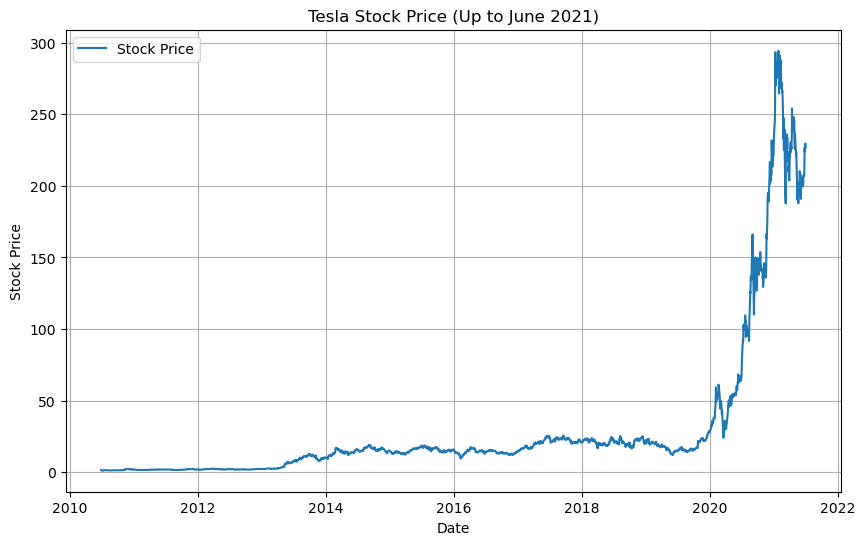

In [23]:
# QUESTION 5
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, date_col, price_col, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[date_col], data[price_col], label='Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Filter the Tesla data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Plot the Tesla stock graph
make_graph(tesla_data_filtered, date_col='Date', price_col='Close', title='Tesla Stock Price (Up to June 2021)')

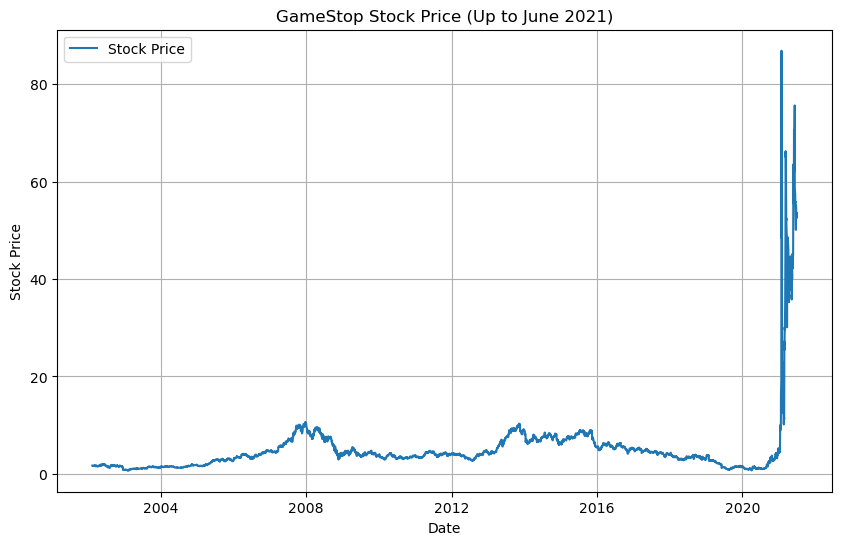

In [24]:
# QUESTION 6
# Filter the GameStop data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Plot the GameStop stock graph
make_graph(
    data=gme_data_filtered, 
    date_col='Date', 
    price_col='Close', 
    title='GameStop Stock Price (Up to June 2021)'
)
